## 04-04 TF-IDF(Term Frequency-Inverse Document Frequency)

이번에는 DTM 내에 있는 각 단어에 대한 중요도를 계산할 수 있는 TF-IDF 가중치에 대해서 알아보겠습니다. TF-IDF를 사용하면, 기존의 DTM을 사용하는 것보다 보다 많은 정보를 고려하여 문서들을 비교할 수 있습니다. TF-IDF가 DTM보다 항상 좋은 성능을 보장하는 것은 아니지만, 많은 경우에서 DTM보다 더 좋은 성능을 얻을 수 있습니다.

### TF-IDF(단어 빈도-역 문서 빈도, Term Frequency-Inverse Document Frequency)

TF-IDF는 TF와 IDF를 곱한 값을 의미하는데 이를 식으로 표현해보겠습니다. 문서를 d, 단어를 t, 문서의 총 개수를 n이라고 표현할 때 TF, DF, IDF는 각각 다음과 같이 정의할 수 있습니다.   
TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단합니다. TF-IDF 값이 낮으면 중요도가 낮은 것이며, TF-IDF 값이 크면 중요도가 큰 것입니다.   
각 단어의 TF는 DTM에서의 각 단어의 값과 같으므로, 앞서 사용한 DTM에서 단어 별로 위의 IDF값을 곱해주면 TF-IDF 값을 얻습니다.

1. tf(d,t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수.

 TF는 앞에서 배운 DTM의 예제에서 각 단어들이 가진 값들입니다. DTM이 각 문서에서의 각 단어의 등장 빈도를 나타내는 값이었기 때문입니다.

2. df(t) : 특정 단어 t가 등장한 문서의 수.

특정 단어가 각 문서, 또는 문서들에서 몇 번 등장했는지는 관심가지지 않으며 오직 특정 단어 t가 등장한 문서의 수에만 관심을 가집니다.

3. idf(d, t) : df(t)에 반비례하는 수.

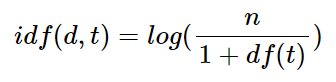

또 다른 직관적인 설명은 불용어 등과 같이 자주 쓰이는 단어들은 비교적 자주 쓰이지 않는 단어들보다 최소 수십 배 자주 등장합니다. 그런데 비교적 자주 쓰이지 않는 단어들조차 희귀 단어들과 비교하면 또 최소 수백 배는 더 자주 등장하는 편입니다. 이 때문에 log를 씌워주지 않으면, 희귀 단어들에 엄청난 가중치가 부여될 수 있습니다. 로그를 씌우면 이런 격차를 줄이는 효과가 있습니다. log 안의 식에서 분모에 1을 더해주는 이유는 첫번째 이유로는 특정 단어가 전체 문서에서 등장하지 않을 경우에 분모가 0이 되는 상황을 방지하기 위함입니다.

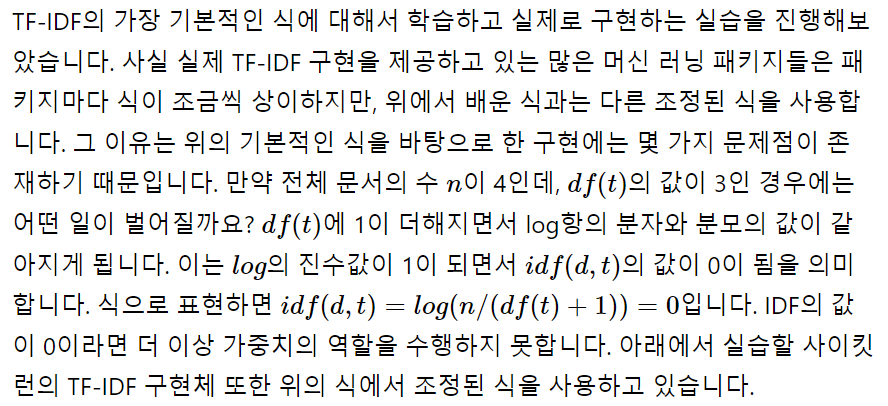

### 파이썬으로 TF-IDF 직접 구현하기

In [1]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split())) # 토큰화
vocab.sort() 

In [4]:
# 총 문서의 수
N = len(docs) 

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc # 0 + True = 1
  return log(N/(df+1))

def tfidf(t, d):
  return tf(t,d)* idf(t)

In [18]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab) # DTM 구하기
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [17]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [19]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


### 사이킷런을 이용한 DTM과 TF-IDF 실습

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray()) # DTM 완성

# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

tfidfv = TfidfVectorizer().fit(corpus) # TF-IDF를 자동 계산해주는 TfidfVectorizer를 제공
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}
